<a href="https://colab.research.google.com/github/Katmalu/hse23_hw4/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Hi_C_HSE_minor_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read the https://pairtools.readthedocs.io/en/latest/ and https://cooler.readthedocs.io/en/latest/index.html
for more information

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()


⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


Homework report should include:  
1) scaling plot in log-log coordinates with description; create correct labels for scaling plot, including units of measurement; make comments on operations in cell starting with ##!!!  
2) replicates clusterization for all files (in directory for the lecture) with dendrogram and description;  make comments on operations in cells starting with ##!!!  

In [2]:
%%bash 
pip install cooler
pip install hicrep


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 26.8 MB/s eta 0:

In [1]:
import matplotlib.pyplot as plt

In [2]:
import cooler

In [3]:
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import seaborn as sns
import pandas as pd
import hicrep
from hicrep import hicrepSCC
from hicrep.utils import readMcool

In [6]:
mcool ='/content/drive/MyDrive/Копия HiC1.dm3.mapq_30.1000.mcool'


In [7]:
resolution = 20000
clr = cooler.Cooler(f'{mcool}::resolutions/{resolution}')

Tasks for seminar:   
1) get info and attributes of Hi-C matrix with cooler.info  
2) open cooler object as balanced matrix for intrachromosomal contacts   
3) open cooler as unbalanced matrix for interchromosomal contacts  
4) get table with coordinates and contacts, are they raw or balanced?  
5) get the table in command line with command *cooler dump*  
6) look at the table with bins, which columns present there?  
7) plot a piece of map (log)  
8) scaling plot  (in log - log coordinates)  
9) replicates clusterization



In [8]:
clr.info

{'bin-size': 20000,
 'bin-type': 'fixed',
 'creation-date': '2023-04-06T04:39:00.281457',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.11',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 6024,
 'nchroms': 7,
 'nnz': 7122786,
 'storage-mode': 'symmetric-upper',
 'sum': 63912926}

In [10]:
m=clr.matrix(balance=True).fetch('chrX')

In [10]:
pix=clr.pixels(join=True)[:]

In [11]:
bins=clr.bins()[:]

<ipython-input-12-57c1b47ce89e>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(m[120:180,120:180]),cmap='coolwarm')


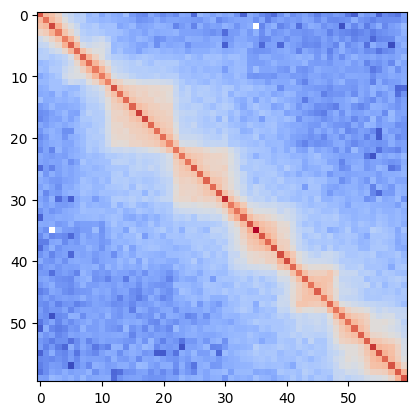

In [12]:
plt.imshow(np.log(m[120:180,120:180]),cmap='coolwarm')

In [11]:
##!!! тут мы считаем среднее число взаимодействий участков находящихся на расстоянии i друг от друга тоесть среднее по i-ой диагонали
z=np.zeros(len(m))
for i in range(len(m)):
  z[i]=np.nanmean(np.diagonal(m,i))

<ipython-input-11-1d42a978bf5a>:4: RuntimeWarning: Mean of empty slice
  z[i]=np.nanmean(np.diagonal(m,i))


Text(0, 0.5, 'contacts frequency')

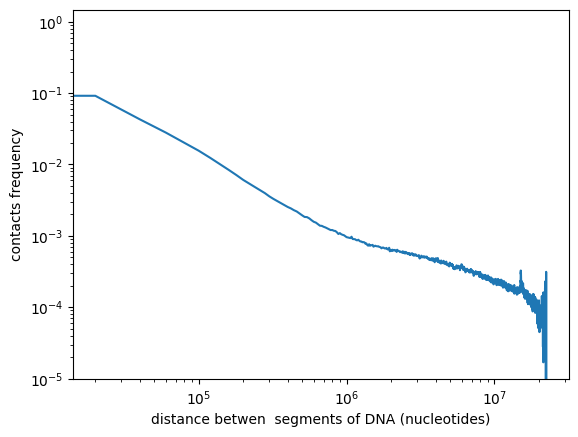

In [14]:
##!!! write comments for each row я не знаю что тут вообще можно комментировать 
##!!! why do we paste 20000 below? потому что в clr хранится информация о взаимодействии участков по 20000 нуклеотид
plt.plot(np.arange(len(m))*20000,z)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('distance betwen  segments of DNA (nucleotides)')
plt.ylabel('contacts frequency')

Replicates clusterization with stratum-adjusted correlation coefficient (scc)


We have replicates for 2 *drosophila* cell lines: Bg3 and Kc167.  
Bg3 - nervous cell line (HiC1...., HiC2... files)   
Kc167 - embryonic cell line  (HiC3...., HiC4... files)  
The aim is to conduct replicates clusterization, using scc and demonstrate  that replicates of same cell line tend to be closer to each other comparing with different cell types.    
Hicrep can only calculate scc for each chromosome separately.  
This is why you obtain several values with hicrepSCC function (run code below). The number of the values is equal to the number of chromosomes in cool file. So lets imagine, you take 2 mcool (or cool) files and decide to calculate scc between Hi-C matrices storing in these files only for chromosome 'chr2L', than for 'chr2R', etc. You will obtain as many scc as there are chromosomes in the Hi-C map. This is exactly what hicrepSCC function gives as an output. But then, to get single general scc value for 2 Hi-C maps (2 replicates) you should calculate average value of scc across all the chromosomes.   
So you have an scc (averaged across chrs) for each pair of samples (HiC1-HiC2,HiC1-HiC3,HiC1-HiC4,HiC2-HiC3,HiC2-HiC4,HiC3-HiC4). Now you can use these values as the measure of similarity between each 2 samples and build a dendrogram.  
To do this, you should construct symmetric matrix of similarity from calculated SCCs with ones on the diagonal.
This matrix should be used as an input for 'linkage' function (see below)

In [ ]:
# Now calculate scc for each pair of samples, average across chromosomes and create matrix of similarity

In [23]:
##!!! describe the next four parameter (as comments)
binSize = 20000 
#binSize - разрешение (взаимодействия участков какой длины у нас обозначают пиксели)
dBPMax = 5000000 
#dBPMax - максимальное учитываемое в рассчетах расстояние между нуклеотидами
bDownSample = True
#bDownSample - выравнивание 2 сравниваемых реплик до одинакового суммарного количества контактов
h=0
#h - коэффицент отвечающий за улучшение данных с помощью сглаживания, h = 0 без фильтра, чем больше h тем больше сглаживание

fmcool = {}
cool = {}
binSizes = {}
scc = np.empty((4,4))

for i in range(4):
  fmcool[i] = f'/content/drive/MyDrive/Копия HiC{i+1}.dm3.mapq_30.1000.mcool'
  cool[i], binSizes[i] = readMcool(fmcool[i], binSize)

for i in range(4):
  for j in range(4):
    d = hicrepSCC(cool[i], cool[j], h, dBPMax, bDownSample)
    scc[i][j] = np.nanmean(d)

# оно может ругаться но считает при этом правильно


/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return 

In [24]:
scc 

array([[0.99973918, 0.67234713, 0.41766741, 0.39084177],
       [0.67267269, 1.        , 0.42419555, 0.39545354],
       [0.41916289, 0.42353271, 0.99974425, 0.65403424],
       [0.39145297, 0.39317414, 0.65534652, 1.        ]])

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 0.45003321568696664, 0.45003321568696664, 0.0],
  [0.0, 0.5048443998502018, 0.5048443998502018, 0.0],
  [0.45003321568696664,
   1.7273567353903223,
   1.7273567353903223,
   0.5048443998502018]],
 'ivl': ['HiC1_Bg3', 'HiC2_Bg3', 'HiC3_Kc167', 'HiC4_Kc167'],
 'leaves': [0, 1, 2, 3],
 'color_list': ['C0', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C0', 'C0']}

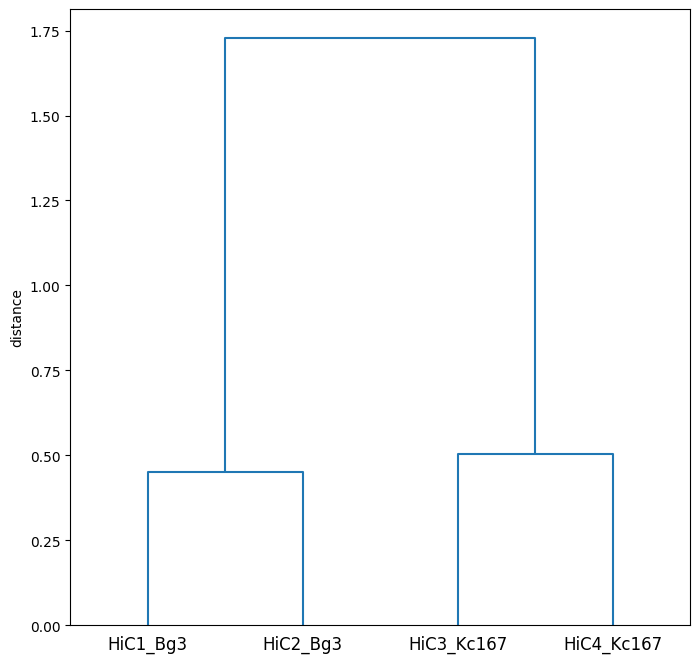

In [37]:
## A piece of code for the dendrogram generation
import scipy

Z=scipy.cluster.hierarchy.linkage(scc, 'single', 'correlation')
plt.figure(figsize=(8,8))
plt.ylabel('distance')

scipy.cluster.hierarchy.dendrogram(Z, color_threshold=0,labels=['HiC1_Bg3', 'HiC2_Bg3', 'HiC3_Kc167', 'HiC4_Kc167'])

